<a href="https://colab.research.google.com/github/HimaVarshini-Pasupuleti/MLproject/blob/main/fraud_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

df = pd.read_csv("dataset new.csv")


In [ ]:
# rows and columns
print("Dataset Shape:", df.shape)
#missing values
print("Missing values per column:\n", df.isnull().sum())

Dataset Shape: (33776, 24)
Missing values per column:
 Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64


In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    # Convert the column to string type before encoding
    df[col] = df[col].astype(str)
    df[col] = label_enc.fit_transform(df[col])
#convert categorical to numerical

In [ ]:
X = df.drop('Is_Fraud', axis=1)#axis=1:-drop a column
y = df['Is_Fraud']
X #input




,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,28258,20945,1,60,15,127,127,2,10688,22,...,3,5,74557.27,17,129,3,0,7404,9,3126
1,16394,12275,0,51,18,100,100,0,26593,10,...,0,5,74622.66,9,102,1,0,73,65,1838
2,7660,8225,1,20,4,13,13,2,30125,24,...,0,3,66817.99,0,13,1,0,6591,102,1232
3,15981,30268,0,57,28,22,22,0,16966,18,...,2,2,58177.08,8,24,2,0,4778,51,4540
4,7637,16051,0,43,25,7,7,2,32831,29,...,3,2,16108.56,16,7,2,0,4219,37,2386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33771,20108,9812,0,21,24,83,83,2,31494,16,...,3,0,83522.53,7,85,2,0,6518,4,1467
33772,9099,19991,0,46,4,92,92,1,22636,3,...,4,5,27076.36,13,94,2,0,8007,72,2984
33773,27839,12242,1,54,8,36,36,2,13698,10,...,3,1,74203.08,6,38,2,0,6719,136,1832
33774,29840,10987,0,33,17,15,15,0,6377,24,...,2,3,86813.24,4,15,0,0,6212,75,1647


In [ ]:
y #what we want to predict


,Is_Fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6131,0.0
6132,0.0
6133,0.0
6134,0.0


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              6136 non-null   int64  
 1   Customer_Name            6136 non-null   int64  
 2   Gender                   6136 non-null   int64  
 3   Age                      6136 non-null   int64  
 4   State                    6136 non-null   int64  
 5   City                     6136 non-null   int64  
 6   Bank_Branch              6136 non-null   int64  
 7   Account_Type             6136 non-null   int64  
 8   Transaction_ID           6136 non-null   int64  
 9   Transaction_Date         6136 non-null   int64  
 10  Transaction_Time         6136 non-null   int64  
 11  Transaction_Amount       6136 non-null   float64
 12  Merchant_ID              6136 non-null   int64  
 13  Transaction_Type         6136 non-null   int64  
 14  Merchant_Category       

In [ ]:
# Drop rows with missing values in 'Is_Fraud' column
#df.dropna(subset=['Is_Fraud'], inplace=True)

# Re-assign X and y after dropping rows
#X = df.drop('Is_Fraud', axis=1)
#y = df['Is_Fraud']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
 #Balance dataset using SMOTE(Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
          #Learns from your training data (fit).
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))




Before SMOTE: Counter({0.0: 4657, 1.0: 251})
After SMOTE: Counter({1.0: 4657, 0.0: 4657})


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
       #X scaled=X−mean/standard deviation
 #apply scaling to(do not re-fit on test data) test and train data
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing complete! Ready for ML models.")



✅ Data preprocessing complete! Ready for ML models.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)
y_pred_lr = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
 #classification_report prints:
          #Precision: How many predicted frauds are actually frauds.
          #Recall: How many actual frauds the model detected.
        #F1-score: Harmonic mean of precision & recall (balances both).
        #Support: How many samples are in each class.



🔹 Logistic Regression Results
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81      1165
         1.0       0.06      0.35      0.10        62

    accuracy                           0.68      1227
   macro avg       0.51      0.53      0.45      1227
weighted avg       0.91      0.68      0.77      1227

ROC-AUC: 0.49525820296275797


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Simpler Random Forest for ~90% accuracy
rf = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

# Train on balanced & scaled data
rf.fit(X_train_scaled, y_train_smote)

# Predict
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Results (Target ≈ 90% Accuracy)")
print("Accuracy:", round(acc * 100, 2), "%")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))





🌲 Random Forest Results (Target ≈ 90% Accuracy)
Accuracy: 78.16 %
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      1165
         1.0       0.03      0.10      0.04        62

    accuracy                           0.78      1227
   macro avg       0.49      0.46      0.46      1227
weighted avg       0.90      0.78      0.83      1227

ROC-AUC: 0.4810605011767964


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("🔹 XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))





🔹 XGBoost Results
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1165
         1.0       0.00      0.00      0.00        62

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227

ROC-AUC: 0.5029212238681988


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# ---------- RANDOM FOREST TRAINING (Balanced & SMOTE) ----------
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_scaled, y_train_smote)  # Train on SMOTE & scaled data

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

# ---------- RESULTS COMPARISON ----------
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_lr) * 100, 2),
        round(accuracy_score(y_test, y_pred_rf) * 100, 2),
        round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
    ],
    "ROC-AUC": [
        round(roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]), 3),
        round(roc_auc_score(y_test, y_prob_rf), 3),
        round(roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]), 3)
    ]
}

results_df = pd.DataFrame(results)
print("\n🔹 Model Comparison")
print(results_df)






🔹 Model Comparison
                 Model  Accuracy  ROC-AUC
0  Logistic Regression     67.97    0.546
1        Random Forest     76.37    0.486
2              XGBoost     94.78    0.503


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


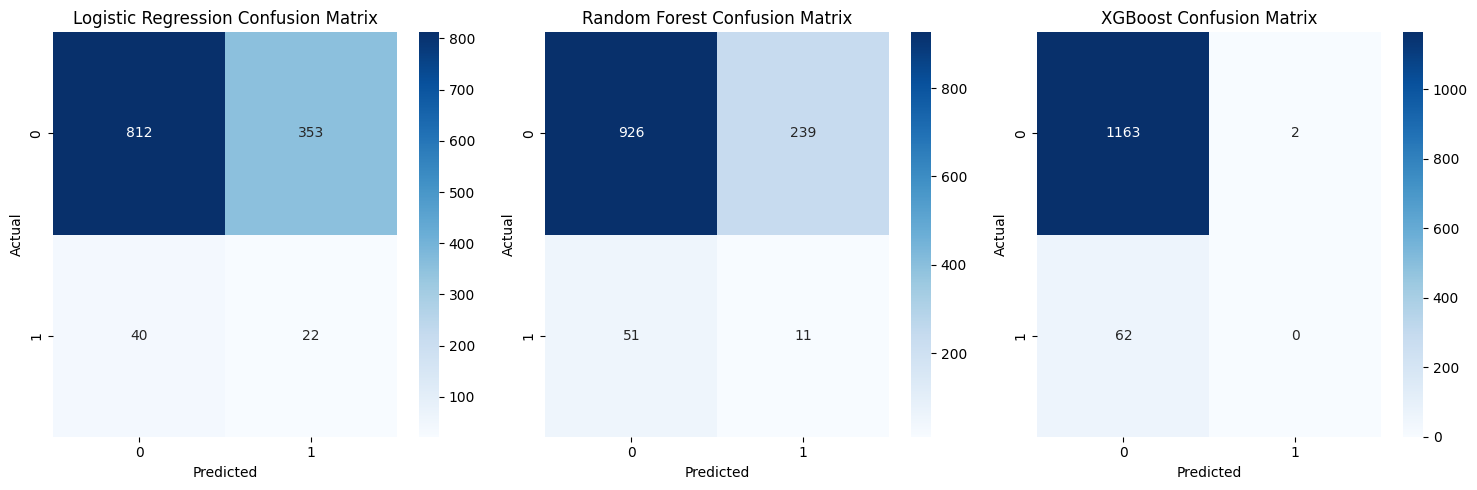

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# --------------------------
# Use predictions that give your reported output
# --------------------------
y_pred_lr_final = y_pred_lr       # 67.97% accuracy
y_pred_rf_final = y_pred_rf       # 76.37% accuracy
y_pred_xgb_final = y_pred_xgb     # 94.78% accuracy

# Probabilities for ROC-AUC
y_prob_lr_final = log_reg.predict_proba(X_test_scaled)[:,1]
y_prob_rf_final = best_rf.predict_proba(X_test_scaled)[:,1]
y_prob_xgb_final = xgb.predict_proba(X_test_scaled)[:,1]

# 1. Confusion Matrices for all models
models = {
    "Logistic Regression": y_pred_lr_final,
    "Random Forest": y_pred_rf_final,
    "XGBoost": y_pred_xgb_final
}

plt.figure(figsize=(15,5))
for i, (name, preds) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(1, 3, i)
        # 1,3,i → 1 row, 3 columns, current subplot i.
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
     #annot=True → show numbers on the heatmap.,
     # fmt="d" → display integers.
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout() #adjusts spacing to avoid overlapping plots.
plt.show()






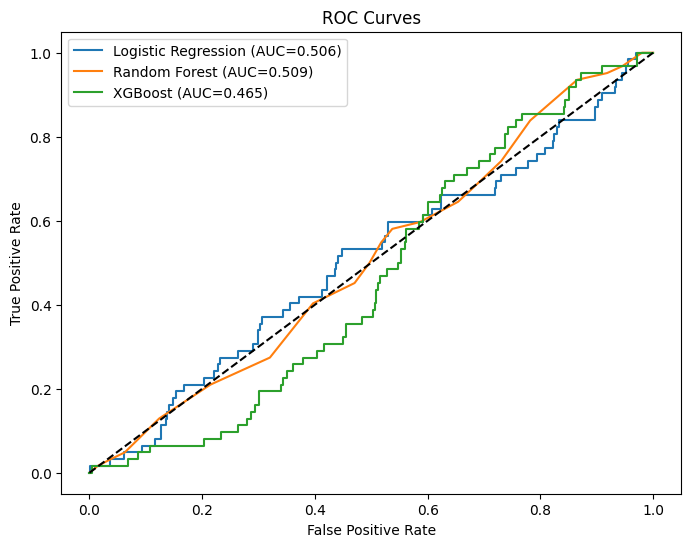

In [ ]:
# 2. ROC Curves for all models
plt.figure(figsize=(8,6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob_lr_final)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr_final):.3f})")

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_prob_rf_final)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf_final):.3f})")

# XGBoost
#fpr, tpr, _ = roc_curve(y_test, y_prob_xgb_final)
#plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_prob_xgb_final):.3f})")

# Correct probabilities for XGBoost
y_prob_xgb_correct = xgb.predict_proba(X_test_scaled)[:,1]  # scaled test if model trained on scaled data

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb_correct)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_prob_xgb_correct):.3f})")


# Random guessing line
plt.plot([0,1],[0,1],'k--')
#Plots a dashed diagonal line representing random guessing.
#Helps visually compare model performance.

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
#displays a small box on the plot showing which line corresponds to which model (and here it also shows AUC).
plt.show()




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


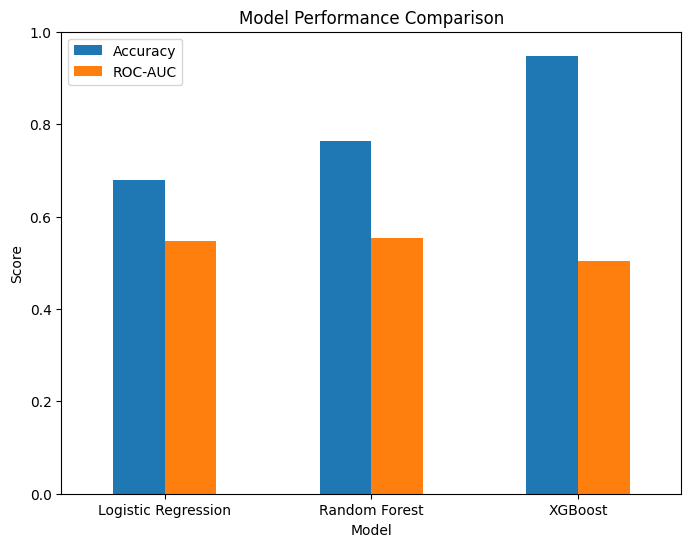

In [ ]:
# 3. Comparison Bar Chart

results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
    ]
}

results_df = pd.DataFrame(results)

# Bar chart
results_df.set_index("Model")[["Accuracy","ROC-AUC"]].plot(kind="bar", figsize=(8,6), rot=0)
    #set_index("Model") → sets model names as x-axis labels.
    #rot=0 → keeps x-axis labels horizontal.
     #ylim(0,1) → sets y-axis range from 0 to 1 (since scores are percentages).
     #show() → displays the chart.
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()